# Health Insurance Marketplace Analysis
<b>Author Barcot Siraj

## Instruction

This project will analyze the healthcare insurance dataset across 38 states in the country. There are six dataset sources, these are; 
1.BenefitsCostSharing.csv
2.BusinessRules.csv
3.Network.csv
4.PlanAttributes.csv
5.Rate.csv
6.ServiceArea.csv 
The set of seven public use files containing information on health insurance issuers participating in the Health Insurance Marketplace and certified qualified health plans (QHPs) offered on HealthCare.gov. Plan information incudes details about essential health benefits, cost sharing, rates, and geographic coverage.

The datasets used in this report contain data on health and dental plans offered to individuals and small businesses through the US Health Insurance Marketplace. This data was originally prepared and released by the Centers for Medicare & Medicaid Services (CMS), which is part of the U.S. Department of Health and Human Services (HHS). In this report we try to find some useful information to support the CMS work.

The main business question this project will address is predicting the health Plan that will be a dental or full health plan.
Lets start our analysis with BenefitsCostSharing.csv dataset to answer How do plan rates and benefits vary across states?

In [ ]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import sklearn.model_selection
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

<b>Here is the link to download the entire dataset</b>

https://www.kaggle.com/hhs/health-insurance-marketplace/data

<b>First import the dataset

In [56]:
CostShare_df = pd.read_csv(r"C:\Users\Barki\Desktop\Healthcare Datasets\BenefitsCostSharing.csv")


C:\Users\Barki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



In [57]:
#Visualize the first few row of the dataset.
CostShare_df.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [58]:
CostShare_df.BenefitName.describe()

count                 5048408
unique                    861
top       Orthodontia - Adult
freq                    77377
Name: BenefitName, dtype: object

In [59]:
CostShare_df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1804253    429              Orthodontia - Adult  27389

As Described above the top benefit plan in the three years are Acccidnetal Dental and Orthodential- Adut.

In the following section we will analyze the amount of benefit plan consumed by each state.This will help us see which state
is consuming how much benefit plan.

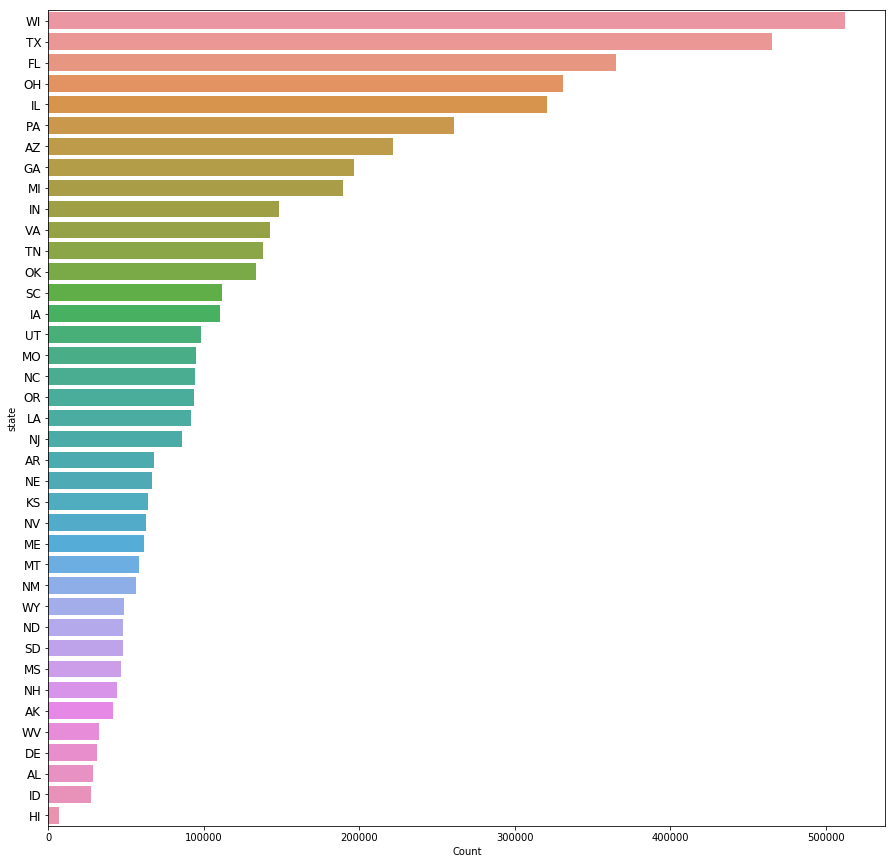

In [60]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit)   
df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

Now we draw conclusion that state WI is larger consumer of healthcare services. We may have to consider the current population of each state and above stats(graph)to decide our strategy to cover more people accordingly.

Lets have a one more look at which benefit plan is consumed more by the population of the respective state.

In [61]:
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'YIOrRed',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = 'Benefit plan spread across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

In [62]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84     Dental Check-Up for Children   720
AL              28417    115              Orthodontia - Adult   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Basic Dental Care - Child  3345
DE              31370    110        Basic Dental Care - Adult   602
FL             364742    194     Dental Check-Up for Children  5130
GA             196579    151        Major Dental Care - Child  2893
HI               6741     76              Orthodontia - Adult   110
IA             110221    104     Dental Check-Up for Children  1727
ID              27313     71              Orthodontia - Child   447
IL             320533    157        Basic Dental Care - Child  4299
IN             148531    109     Dental Check-Up for Children  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125     Dental Check-Up for Children  1491
ME              61834     99     Dental Check-Up for Children   975
MI             189225    205        Major Dental Care - Adult  3248
MO              95152    127     Dental Check-Up for Children  1577
MS              46895    104     Dental Check-Up for Children   725
MT              58132     75     Dental Check-Up for Children  1049
NC              94290     98     Dental Check-Up for Children  1537
ND              48269     77     Dental Check-Up for Children   974
NE              66935     90        Major Dental Care - Adult  1238
NH              44305     98              Orthodontia - Child   707
NJ              86107    100     Dental Check-Up for Children  1357
NM              56669     78     Dental Check-Up for Children   828
NV              62743    121     Dental Check-Up for Children   930
OH             331045    193     Dental Check-Up for Children  5092
OK             133639     83     Dental Check-Up for Children  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157        Major Dental Care - Adult  4208
SC             111907     85     Dental Check-Up for Children  1817
SD              47730     79     Dental Check-Up for Children   843
TN             138154    129     Dental Check-Up for Children  2073
TX             465164    180     Dental Check-Up for Children  6441
UT              98421    101     Dental Check-Up for Children  1527
VA             142236    145     Dental Check-Up for Children  2256
WI             512587    146  Routine Dental Services (Adult)  7135
WV              32638     77              Orthodontia - Child   625
WY              48425     92     Dental Check-Up for Children   807

In the following section plan rate is analyzed to explore the individual rate distribution.
First we import the dataset.

C:\Users\Barki\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



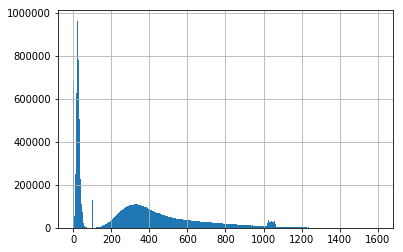

In [197]:
df_rate = pd.read_csv(r'C:\Users\Barki\Desktop\Healthcare Datasets\Rate.csv')
df1 = df_rate[['Age', 'IndividualRate']]
#Replacing any non-numerics with NaN
df1.Age = df1.Age._convert(numeric = True)
#Dropping NaN values
df1 = df1.dropna()
#The convert turns our Age group into floats. Converting them back into integers
df1.Age = df1.Age.astype(int)
#We have some major outliers in the 10,000 region lets isolate the data
df2 = df1[df1.IndividualRate < 1600]
#Lets look at a histogram of our Individual Rate data
df2.IndividualRate.hist(bins = 300)

Text(0.5,0,'Individual Rate')

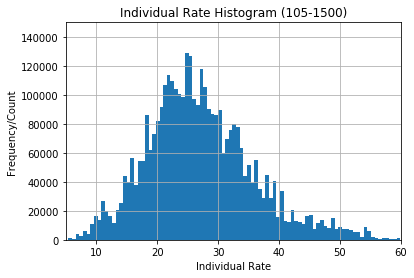

In [65]:
#Now lets take a look at the distribution from 0-60
dfb = df1[df1.IndividualRate < 60]
dfb.IndividualRate.hist(bins = 100)
plt.xlim(5, 60)
plt.ylim(0, 150000)
plt.title('Individual Rate Histogram (105-1500)')
plt.ylabel('Frequency/Count')
plt.xlabel('Individual Rate')

 First we clean the rate dataset before implementing the models.

In [66]:
df_rate[df_rate.IndividualRate>9000].IndividualRate.unique()

array([ 999999.  ,    9999.  ,    9999.99])

In [67]:
df_rate = df_rate[df_rate.IndividualRate <9000]

We will focus on family option plans analysis, so we delete all the plans for special ages:

In [198]:
df_rate = df_rate[df_rate.Age == "Family Option"]
df_rate.head(3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
5,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,16


In [193]:
#df_rate = df_rate.dropna()
df_rate['ImportDate']=df_rate['ImportDate'].apply(pd.to_datetime)
 

In [170]:
RateData_FO=df_rate.drop(['BusinessYear'],1)

<b> Cleaning the PlanAtttribute dataset

In [70]:
planattribute_raw = pd.read_csv(r"C:\Users\Barki\Downloads\health-insurance-marketplace\PlanAttributes.csv")
planattribute_raw.head(3)

C:\Users\Barki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.



,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,NaN,0,0,1,2014,Standard High Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN


In [71]:
plan_data=planattribute_raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','MetalLevel',
                                        'TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']]
plan_data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


In [178]:
plan_data['TEHBInnTier1FamilyMOOP']=plan_data['TEHBInnTier1FamilyMOOP'].str.replace('$','').str.replace(',','')
plan_data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP,Family_Up_Limit,Individual_Up_Limit,weekday,month,year,hour,minute,second
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,12700,6350,4,4,2014,11,49,29
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,8000,4000,4,4,2014,11,49,29
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,8000,4000,4,4,2014,11,49,29


In [72]:
plan_data=plan_data.drop(plan_data[plan_data['TEHBInnTier1FamilyMOOP']=='Not Applicable'].index)
plan_data['TEHBInnTier1FamilyMOOP']=plan_data['TEHBInnTier1FamilyMOOP'].fillna(99999999)
plan_data=plan_data.drop(plan_data[plan_data['TEHBInnTier1FamilyMOOP']==99999999].index)
plan_data['ImportDate']=plan_data['ImportDate'].apply(pd.to_datetime)
plan_data['Family_Up_Limit']=''
for x in plan_data.index:
    plan_data.ix[x,"Family_Up_Limit"]=float(plan_data.ix[x,'TEHBInnTier1FamilyMOOP'])
plan_data['Family_Up_Limit']=plan_data['Family_Up_Limit'].astype(int) # Transfer object to int
plan_data['TEHBInnTier1IndividualMOOP']=plan_data['TEHBInnTier1IndividualMOOP'].str.replace('$','').str.replace(',','')
plan_data['Individual_Up_Limit']=''
for x in plan_data.index:
    plan_data.ix[x,"Individual_Up_Limit"]=float(plan_data.ix[x,'TEHBInnTier1IndividualMOOP'])
plan_data['Individual_Up_Limit']=plan_data['Individual_Up_Limit'].astype(int) # Transfer object to int
plan_data.head(3)



C:\Users\Barki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Barki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP,Family_Up_Limit,Individual_Up_Limit
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,12700,6350
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,8000,4000
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,8000,4000


In [73]:
plan_df3=plan_data
plan_df5=planattribute_raw[['PlanId','IssuerId','BusinessYear','DentalOnlyPlan','IsNewPlan','OutOfCountryCoverage','NationalNetwork']]
plan_df5 = plan_df5.dropna()
# We split the plan dataset into 90 to 10 ratio
train_df = plan_df5[1:70000]
test_df = plan_df5[70001:77353]
test_df=test_df.drop(['DentalOnlyPlan'], axis=1)
train_df=train_df.drop(['PlanId'], axis=1)

Conversion of age from a factor to a numeric variable: IsNewPlan,DentalOnlyPlan,OutOfCountryCoverage,NationalNetwork attributes belonging to PlanAttribute.csv is filtered as follows: – Records with age value “Yes” is converted to numeric value 1
Records with age value “No“ are converted into numeric value 0
Records with age value “New“ are converted into numeric value 1
Records with age value “Existing“ are converted into numeric value 0

In [74]:
mapping = {'Yes':1,'No':0}
mapping1={'New':1,'Existing':0}
value=0
train_df['PlanType'] = train_df['DentalOnlyPlan'].map(mapping).astype(int)
train_df['NewPlan'] = train_df['IsNewPlan'].map(mapping1).astype(int)
test_df['NewPlan'] = test_df['IsNewPlan'].map(mapping1).astype(int)
train_df['CountryCoverage'] = train_df['OutOfCountryCoverage'].map(mapping).fillna(value).astype(int)
test_df['CountryCoverage'] = test_df['OutOfCountryCoverage'].map(mapping).fillna(value).astype(int)
train_df['NetworkType'] = train_df['NationalNetwork'].map(mapping).fillna(value).astype(int)
test_df['NetworkType'] = test_df['NationalNetwork'].map(mapping).fillna(value).astype(int)

train_df=train_df.drop(['DentalOnlyPlan','IsNewPlan','OutOfCountryCoverage','NationalNetwork'], axis=1)
test_df=test_df.drop(['IsNewPlan','OutOfCountryCoverage','NationalNetwork'], axis=1)

In [75]:
date_object1 = pd.to_datetime(plan_data['ImportDate'])
plan_df1=plan_data
plan_df1['weekday'] = date_object1.dt.dayofweek
plan_df1['month'] = date_object1.dt.month
plan_df1['year'] = date_object1.dt.year
plan_df1['hour'] = date_object1.dt.hour
plan_df1['minute'] = date_object1.dt.minute
plan_df1['second'] = date_object1.dt.second

(Text(0.5,0,'Year'),
 Text(0,0.5,'Family and Individual Up Limit'),
 <matplotlib.legend.Legend at 0x2c6d4bf7630>)

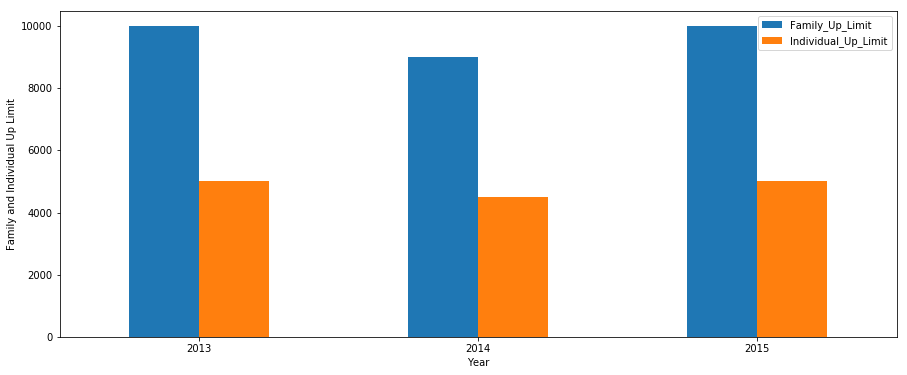

In [76]:
p = plan_df1.groupby('year').median()[["Family_Up_Limit", "Individual_Up_Limit"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
p.set_xlabel("Year"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["Family_Up_Limit", "Individual_Up_Limit"])

Looking stable. So there is no big price fluctuation in U.S. insurance market in there three years.

<b>Plan Coverage Type

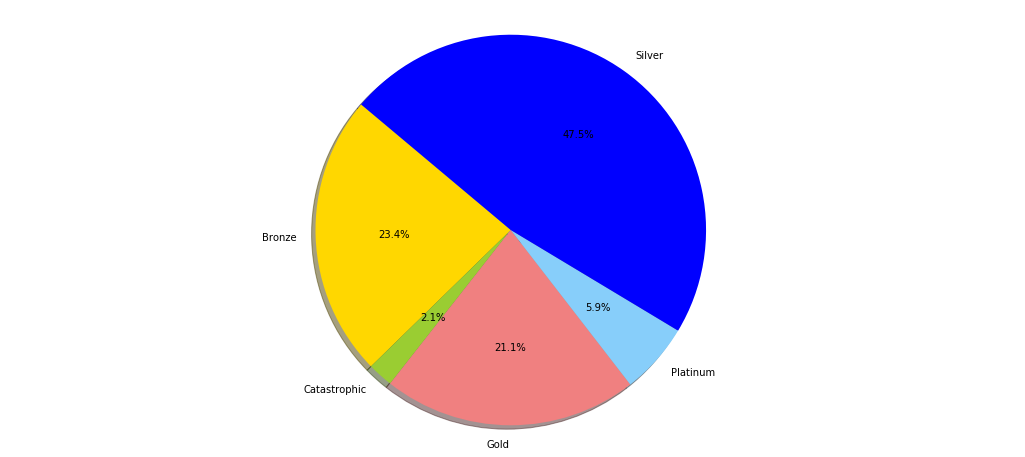

In [77]:
df_plan1=plan_data.groupby(['MetalLevel'], as_index=False)['PlanId'].count()
labels = df_plan1['MetalLevel']
sizes = df_plan1['PlanId']
plt.figure(figsize=(18, 8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Bronze Plan: You pay 40% and the plan pays 60%.<br>
Silver Plan: You pay 30% and the plan pays 70%.<br>
Gold Plan: You pay 20% and the plan pays 80%.<br>
Platinum Plan: You pay 10% and the plan pays 90%.<br>
Catastrophic Plan: You pay 100% of a set amount of money called the deductible before the plan's coverage kicks in. Three primary care visits per year and preventive services are covered for free before you meet the deductible.

<b> State Rate Analysis</b><br>
There are big differences between the states. It's clear that the individual rates in DE, AK and MS 
are very high. Why is it so high? Do the people in these states have enough plan choices? I use "groupby" to coculate it below:

In [199]:
df_rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
5,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,17
9,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,18


Text(0.5,1,'Distribution of Plan Number by State Code \n for the Rate Dataset')

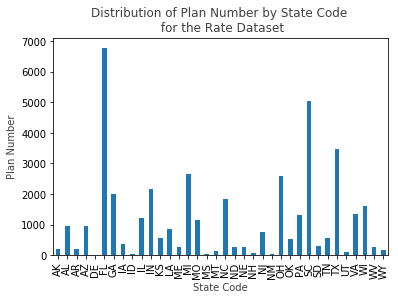

In [201]:
Plans_grouped = df_rate['PlanId'].groupby(df_rate['StateCode'])
Plans_grouped.count().plot(kind='bar')
plt.ylabel('Plan Number', alpha=0.75)
plt.xlabel('State Code', alpha=0.75)
plt.title('Distribution of Plan Number by State Code \n for the Rate Dataset', alpha=0.75)

The graph above shows the states where the plan offered. 
As It can be seen, there are fewer plan choices in DE, AK and MS states. 
The FL uses the plan more than the other states, so you can find the rates in this state are much cheaper. 
You can find why the competition is very important in the health insurance market.


However besides the quantity of plans offered, we are also looking at the average rate in each state, 
in order to confirm if it has a better chance of having lower rate when it comes to more plan options.

<b><b> MODEL SELECTION

<b> Insurance Plan Type Prediction<br></b>
Here We will run three model to predict the health Plan that will be a dental or full health plan.

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Copy df across and drop PlanType
x = train_df
y = test_df
X_train = x.drop('PlanType', axis=1)
# Set y as the PlanType column, we need
# to wrap it in the dataframe to stop it
# being series 
X_test=test_df.drop('PlanId',axis=1)
y_train = pd.DataFrame(train_df.PlanType)
y_test= test_df[:]
 

<b>1. Logistic Regression</b>

Logistic regression predicts the probability of an outcome that can only have two values (i.e. a dichotomy). The prediction is based on the use of one or several predictors (numerical and categorical). This model will predict if a plan is dental only or full health plan.


In [211]:
logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)
LR_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_train, y_train)
LR_pred

C:\Users\Barki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0, 0, 0, ..., 0, 0, 0])

<b>2. Random Forest Classifier</b>

Random Forest are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [147]:
rfc = RandomForestClassifier(n_estimators=100)  
rfc.fit(X_train, y_train)
RFC_pred = rfc.predict(X_test)
RFC_pred
 

C:\Users\Barki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



array([0, 0, 0, ..., 1, 1, 1])

3.<b> Support Vector Machines</b>

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.   


In [150]:
svc = SVC()
svc.fit(X_train, y_train)
SVC_pred = svc.predict(X_test)    
SVC_pred

C:\Users\Barki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0, 0, 0, ..., 1, 1, 1])

<b> Model Evaluations and Discussions </b>

In [132]:
score_logreg = logreg.score(X_train, y_train)
print ("Logistic Regression Score: %f",score_logreg)

Logistic Regression Score: %f 0.850226431806


In [135]:
score_rfc = rfc.score(X_train,y_train)
print ("Random Forest Classifier Score: %f", score_rfc)

Random Forest Classifier Score: %f 0.993228474692


In [136]:
score_svc = svc.score(X_train, y_train)
print ("SVM score: %f", score_svc)

SVM score: %f 0.99281418306


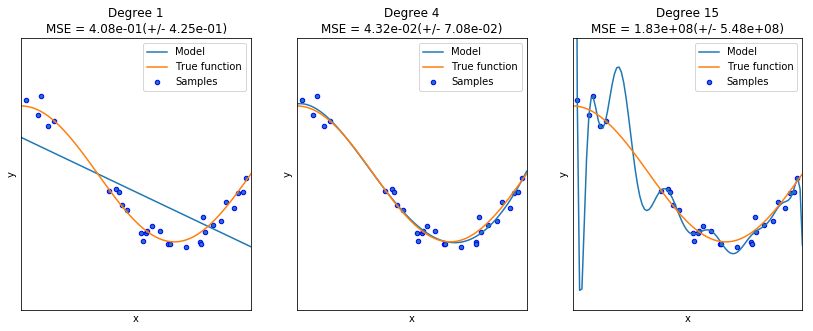

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<b> Comparison of the models</b>

As we observed from the acuracy score Random Forest Model prediction is more accurate that the other two model implemented on the plan attribute dataset. In summeryin this project I have tried to analyze the rate and plan attribute from the dataset.I also tried to predict the plan type using the three model above. Then finally I have compared the accuracy score of the models. According to the result random forest classified performed better in this prediction.